# Exploration of actors repartition based on gender
The aim of this notebook is to explore the dataset with the prism of gender. Do we have enough data available ? What cleaning is necessary ? Do we have enough representation accross categories, countries ? 

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [42]:
# Data source: http://www.cs.cmu.edu/~ark/personas/

# Define the data path
CLEAN_DATA_PATH = 'clean_data/'

### Functions

In [43]:
# Function: filter NaN of a given column
def filter_nan(dataframe, column_to_filter):
    '''
    Create a new dataframe filtering out the NaN values
    of the given column of the given dataframe 
    :param dataframe: pandas.DataFrame
    :param column_to_filter: str
    :return: new dataframe
    '''
    new_df = dataframe.dropna(axis=0, subset=column_to_filter)
    print(f"Cleaning of {column_to_filter} : {new_df.shape[0]} entries left")
    return new_df
    
# def clean_based_on_range(dataframe, value_min, value_max):
#     """
#     Filter  
#     """

## Load and clean the data 

In [44]:
# Load the unfiltered data
characters_df = pd.read_csv(CLEAN_DATA_PATH + "characters.csv")
display(characters_df)

initial_entries_number = characters_df.shape[0]
print(f"Unfiltered dataset: {initial_entries_number} entries")

,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv
450665,913762,/m/03pcrp,1992-05-21,Hibiki,1965-04-12,M,NaN,NaN,Jonathan Fahn,27.0,/m/0kr405_,/m/0kr4090,/m/0bx7_j
450666,28308153,/m/0cp05t9,1957,NaN,1941-11-18,M,1.730,/m/02w7gg,David Hemmings,15.0,/m/0g8ngmc,NaN,/m/022g44
450667,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm


Unfiltered dataset: 450669 entries


In [45]:
# Remove rows with NaN in column actor_gender
filt_characters_df = filter_nan(characters_df, "actor_gender")

# Remove rows with NaN or absurd values in actor_age
filt_characters_df = filter_nan(filt_characters_df, "actor_age")
filt_characters_df = filt_characters_df[filt_characters_df["actor_age"] > 0]
filt_characters_df = filt_characters_df[filt_characters_df["actor_age"] < 120]

# Remove rows with NaN in movie_release_date
filt_characters_df = filter_nan(filt_characters_df, "movie_release_date")

# Remove rows with NaN in name (we postulate that if the name)
filt_characters_df = filter_nan(filt_characters_df, "name")

Cleaning of actor_gender : 405060 entries left
Cleaning of actor_age : 290770 entries left
Cleaning of movie_release_date : 290349 entries left
Cleaning of name : 133294 entries left


Note that the order of column filtering of NaN is independent of the number of entries we obtain at the end.

In [46]:
display(filt_characters_df)

,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450658,913762,/m/03pcrp,1992-05-21,Lord Feff,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr408g,/m/0kr408l,/m/044_7j
450660,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd


## Subset the data

Let's create two dataframes, regrouping actors of the same gender

In [47]:
IS_FEMALE = filt_characters_df["actor_gender"] == "F"

# Create dataframe containing only actresses or actors
actresses_df = filt_characters_df[IS_FEMALE]
actors_df = filt_characters_df[~IS_FEMALE]

display(actresses_df)
display(actors_df)
print(f"""There is {actresses_df.shape[0]} entries in actresses_df and {actors_df.shape[0]} entries in actors_df.
When combining both dataframes, we have {actresses_df.shape[0]+actors_df.shape[0]} entries. 
The filtered dataframe has {filt_characters_df.shape[0]} entries""")

,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg
5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft
6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450634,30553937,/m/0g9ts5h,1998-03-07,Shelley,1965-11-16,F,NaN,NaN,Anneliza Scott,32.0,/m/0jxtpz7,/m/0jxtpzb,/m/0gc5tjv
450639,30553937,/m/0g9ts5h,1998-03-07,Julia,1975-10-10,F,NaN,NaN,Natalie Ramsey,22.0,/m/0jxtsw7,/m/0jxtswb,/m/027dt0m
450653,913762,/m/03pcrp,1992-05-21,Ishtar,1970-02-19,F,NaN,NaN,笠原弘子,22.0,/m/0kr40cw,/m/0kr40cz,/m/01qwg7h
450654,913762,/m/03pcrp,1992-05-21,Sylvie,1966-12-20,F,NaN,NaN,Yumi Tōma,25.0,/m/0kr40cd,/m/0kr40ch,/m/08g3fb


,movie_wiki_id,movie_id,movie_release_date,name,actor_birth_date,actor_gender,actor_height,actor_ethinicity_id,actor_name,actor_age,actor_map_id,id,actor_id
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
8,975900,/m/03vyhn,2001-08-24,Michael Descanso,1971-03-20,M,1.892,NaN,Liam Waite,30.0,/m/03jqhb0,/m/0bgchs4,/m/0ks8b0
11,975900,/m/03vyhn,2001-08-24,Tres,1959-03-09,M,NaN,/m/064b9n,Rodney A. Grant,42.0,/m/0bgchrs,/m/0bgchrw,/m/03ydsb
12,975900,/m/03vyhn,2001-08-24,McSimms,1944-07-22,M,1.800,NaN,Peter Jason,57.0,/m/0bgchxd,/m/0bgchxh,/m/03d663h
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450657,913762,/m/03pcrp,1992-05-21,Maj. Nexx,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr40d9,/m/0kr40df,/m/044_7j
450658,913762,/m/03pcrp,1992-05-21,Lord Feff,1960-04-28,M,NaN,NaN,Steven Blum,32.0,/m/0kr408g,/m/0kr408l,/m/044_7j
450660,913762,/m/03pcrp,1992-05-21,Additional Voices,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr405f,/m/0kr405k,/m/0gn4bz
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz


There is 48506 entries in actresses_df and 84788 entries in actors_df.
When combining both dataframes, we have 133294 entries. 
The filtered dataframe has 133294 entries


Note that there is almost half less entries in actresses_df than in actors_df : after data cleaning we have approximately half less data with female characters than male characters. 
It could be interesting to analyse if one gender present more uncomplete data (containing NaN values) in movie_release_date and actor_name than the other. 

Before plotting any data, let's produce some essential statistics: 

In [48]:
actresses_df.describe()

,movie_wiki_id,actor_height,actor_age
count,4.850600e+04,31446.000000,48506.000000
mean,1.243029e+07,1.665097,32.833649
std,1.071773e+07,0.068118,13.443850
min,3.217000e+03,0.610000,1.000000
25%,2.528212e+06,1.620000,24.000000
50%,9.311522e+06,1.670000,30.000000
75%,2.185521e+07,1.710000,39.000000
max,3.750192e+07,1.910000,96.000000


In [49]:
actors_df.describe()

,movie_wiki_id,actor_height,actor_age
count,8.478800e+04,48715.000000,84788.000000
mean,1.175831e+07,1.844004,40.144478
std,1.076421e+07,4.226882,13.888066
min,3.217000e+03,0.813000,1.000000
25%,2.017210e+06,1.750000,30.000000
50%,8.057423e+06,1.800000,39.000000
75%,2.113900e+07,1.854000,49.000000
max,3.750192e+07,510.000000,94.000000


## Visualizations based on gender

### Age repartition

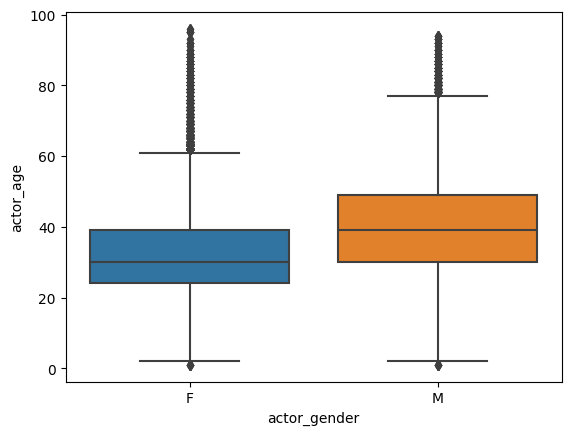

In [50]:
#FIXME Boxplot of actor_age depending on gender
# Add labels, title, axes
# fig, ax = plt.subplot(ncol = 2, figsize = (4,6))

boxplot_gender_age = sns.boxplot(data = filt_characters_df, x="actor_gender", y="actor_age")
# boxplot_gender_age.label(title="Boxplot of age", x= "Actor gender", y = "Actor age")

In [68]:
actresses_age_categories = actresses_df.groupby("actor_age")["actor_gender"].count()
type(actresses_df, x = "actor_age", y = "")

pandas.core.series.Series

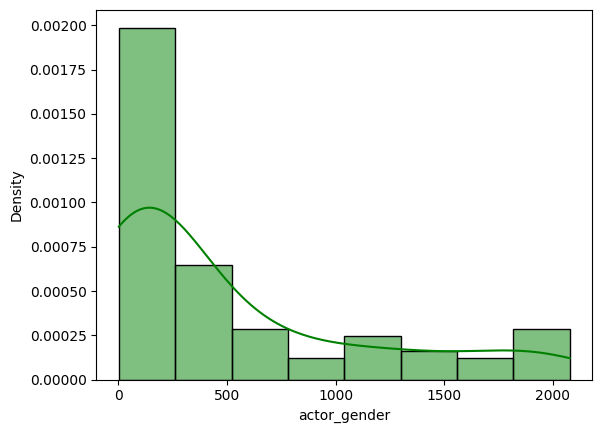

In [69]:
# Plot actor_age repartition
#FIXME : obtain the numbers and not the values inside the categories
ax = sns.histplot(data=actresses_age_categories, kde=True, stat="density", color="green", label="actresses")

### Comparison of actresses and actors number over the years 

In [58]:
#FIXME long loop (>2min) no possibility to check if error in code
# def get_year(dataframe, x):
#     try:
#         return pd.to_datetime(dataframe["movie_release_date"]).year()
#     except:
#         return x

# # Uniformize movie_release_date to string containing only the year
# filt_characters_df["movie_release_date"] = filt_characters_df["movie_release_date"].apply(lambda x: get_year(filt_characters_df, x))

### Age repartition of role played separated by gender